In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import datetime

from dsmanipulator import dsanalyzer as dsa
from dsmanipulator import dsloader as dsl
from dsmanipulator import dscreator as dsc
from dsmanipulator.utils import FileColumnNames

# plt.rc('pgf', texsystem='pdflatex')


In [2]:
fcn=FileColumnNames("TimeStamp", "Relative Time", "srcIP", "dstIP", "srcPort", "dstPort")

filename="../data/mega104-17-12-18-ioa.csv"

dialect = dsl.detect_dialect(filename)
df = dsl.load_data(
    filename,
    data_types={
        "TimeStamp": "datetime",
        "Relative Time": "float",
        "srcIP": "object",
        "dstIP": "object",
        "srcPort": "float",
        "dstPort": "float",
        "ipLen": "float",
        "len": "float",
        "fmt": "object",
        "uType": "object",
        "asduType": "float",
        "numix": "float",
        "cot": "float",
        "oa": "float",
        "addr": "float",
        "ioa": "object",
    },
    dialect=dialect,
    row_limit=None
)

dsc.add_relative_days(df, fcn, inplace=True)
station_ids = dsc.create_station_ids(df, fcn)
dsc.add_station_id(df, fcn, station_ids, inplace=True)
pair_ids = dsc.create_pair_ids(df, fcn)
dsc.add_pair_id(df, fcn, pair_ids, inplace=True)
direction_ids = dsc.create_direction_ids(df, fcn)
dsc.add_direction_id(df, fcn, direction_ids, inplace=True)


,TimeStamp,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,...,numix,cot,oa,addr,ioa,*Relative Day##,*Source station id##,*Destination station id##,*Pair id##,*Direction id##
0,2022-04-24 14:41:44.980,7.988096,192.168.11.111,192.168.11.248,61254.0,2404.0,46.0,4.0,0x00000003,0x00000001,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
1,2022-04-24 14:41:44.980,7.988457,192.168.11.248,192.168.11.111,2404.0,61254.0,46.0,4.0,0x00000003,0x00000002,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
2,2022-04-24 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404.0,61254.0,90.0,21.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,67,0,1,0,0,0
3,2022-04-24 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404.0,61254.0,90.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,0,1,0,0,0
4,2022-04-24 14:41:48.470,11.477121,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58925,2022-04-27 10:36:32.950,244495.958036,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0
58926,2022-04-27 10:36:34.970,244497.977239,192.168.11.111,192.168.11.248,61254.0,2404.0,46.0,4.0,0x00000001,NaN,...,NaN,NaN,NaN,NaN,NaN,3,0,1,0,1
58927,2022-04-27 10:36:35.750,244498.756241,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0
58928,2022-04-27 10:36:43.550,244506.557115,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0


[]

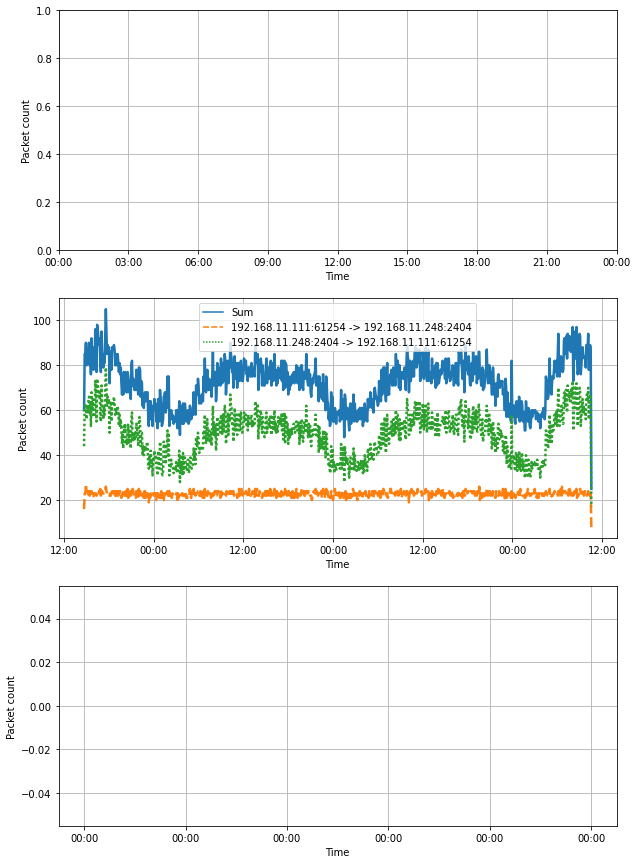

In [17]:
pair_ids

bidict({0: frozenset({0, 1})})